In [309]:
import pandas as pd 
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [310]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)


In [311]:
house_df = pd.read_csv('train.csv')
house_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [312]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [313]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [314]:
missing_df = house_df.isna()
missing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


In [315]:
missing_percentage = missing_df.sum() / len(house_df)
print('percentage of the missing values is \n{}'.format(missing_percentage))


percentage of the missing values is 
Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
B

In [316]:
# house_df.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], inplace=True, axis=1)
house_df.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], inplace=True, axis=1)

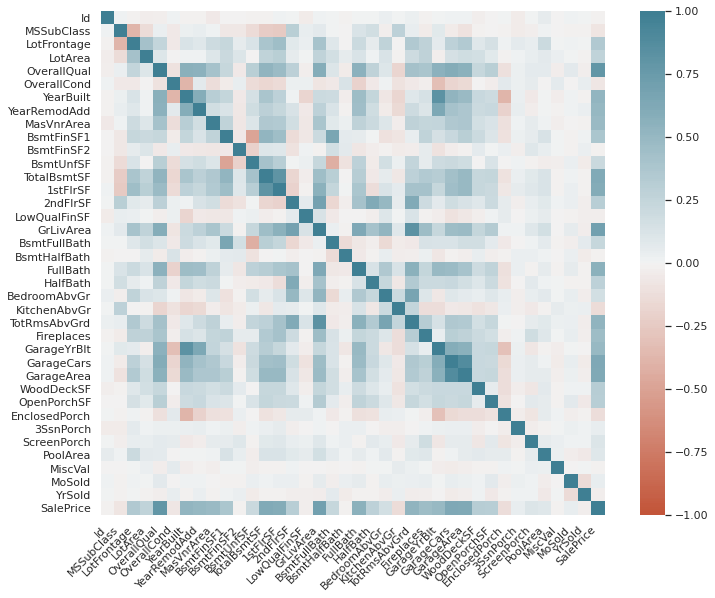

In [317]:

hosue_corr = house_df.corr()
sns.set(rc={'figure.figsize':(12.7,9.27)})

ax = sns.heatmap(
    hosue_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


features such as overallqual, Grlivearea, garagecars, garagearea are useful in order to determine the price of a house

In [318]:
house_log = pd.read_csv('train.csv')
house_log['SalePrice'] = np.log(house_log['SalePrice'])
house_log.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


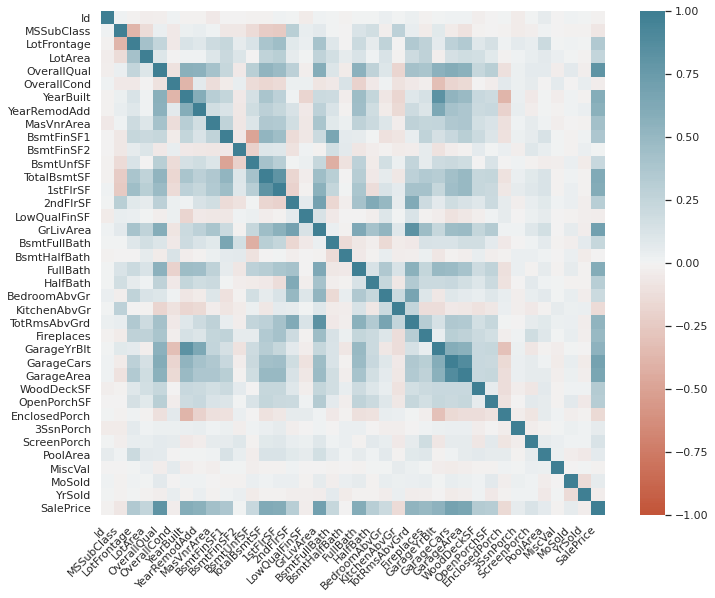

In [319]:
hosue_corr = house_log.corr()
sns.set(rc={'figure.figsize':(12.7,9.27)})

ax = sns.heatmap(
    hosue_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


There is no tangibile difference between the two heatmaps since log is a ascending function and does not change the sort order of the numebrs.

No it is not sufficient to examine all of the features since correlation matrix only works for the numerical features 

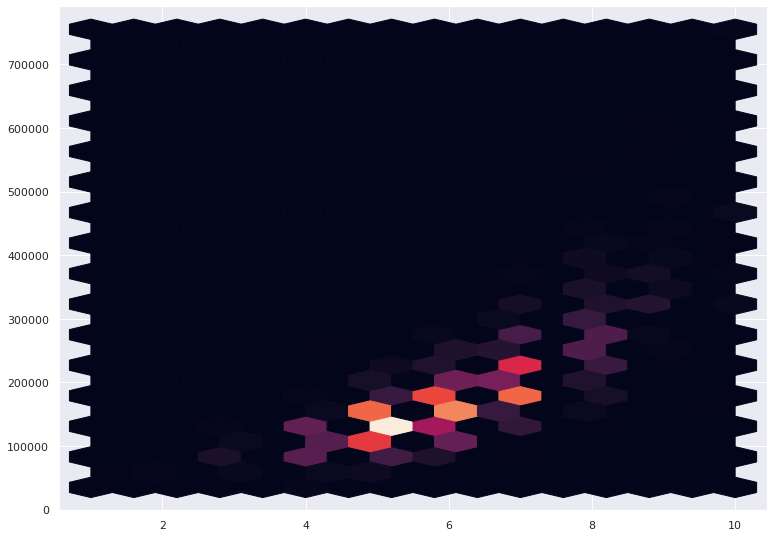

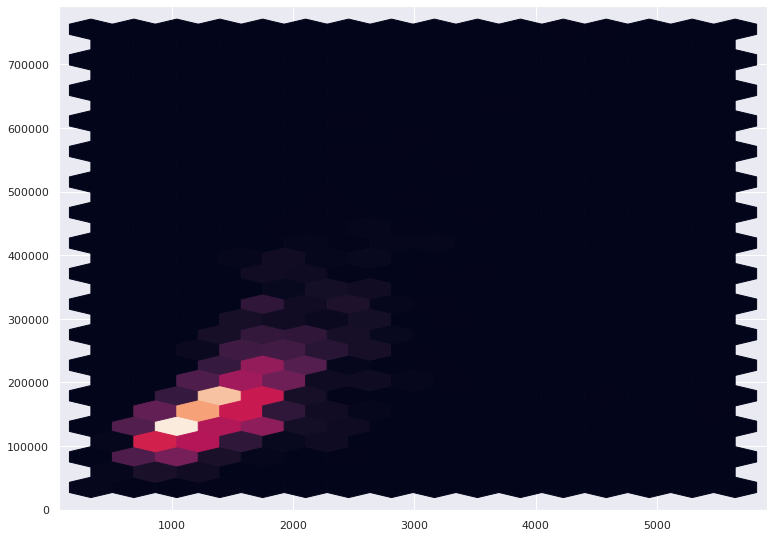

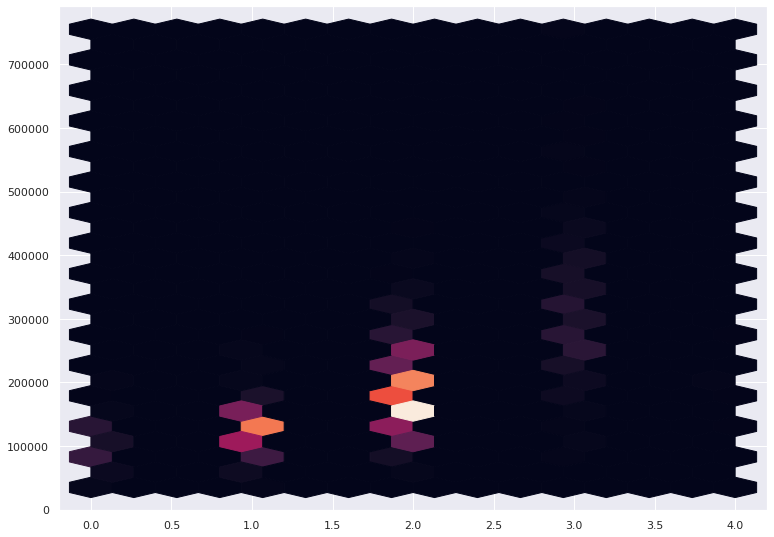

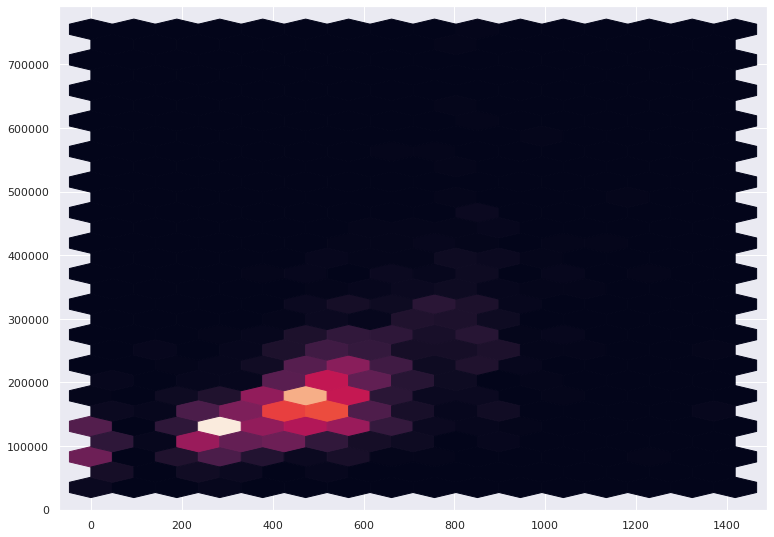

In [320]:
usefule_feat = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

for f in usefule_feat:
  plt.hexbin(house_df[f], house_df['SalePrice'], gridsize=(15,15) )
  plt.show()
 


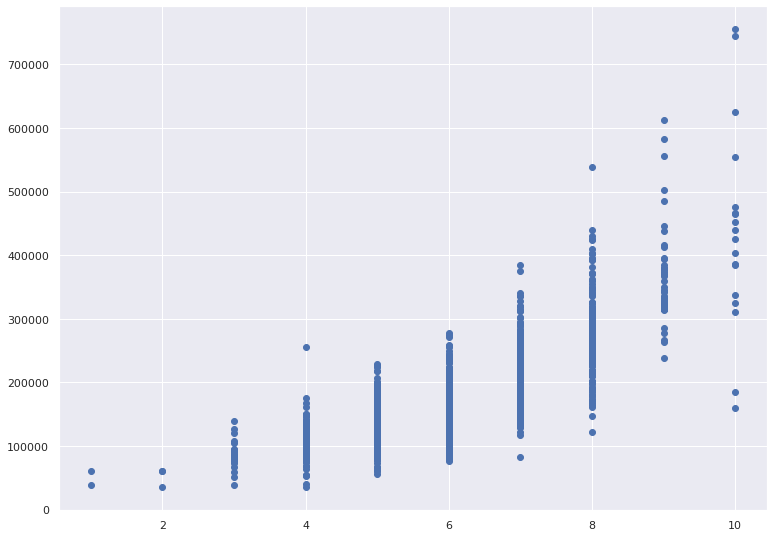

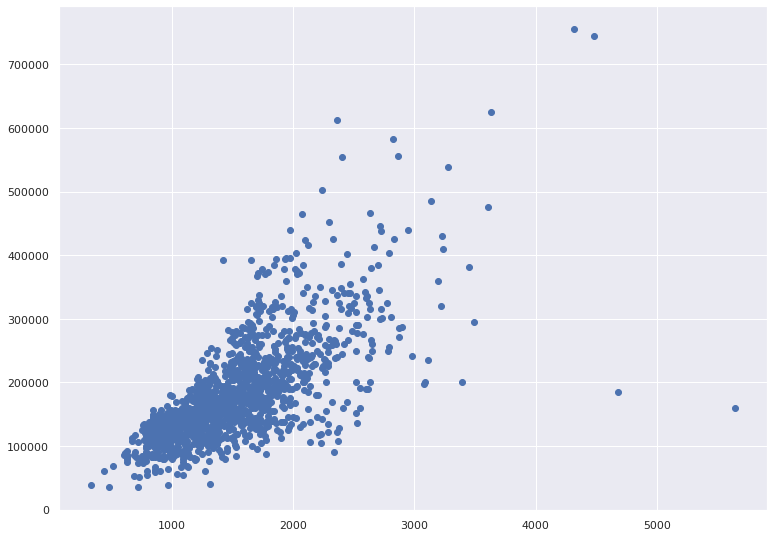

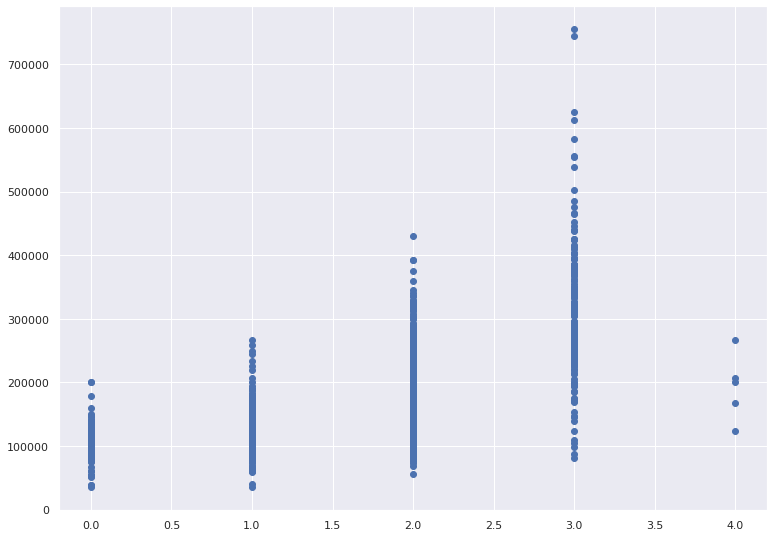

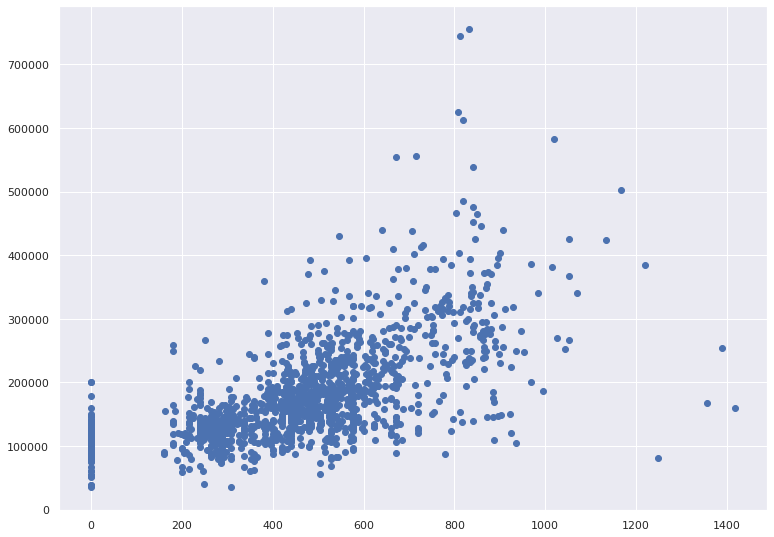

In [321]:
for f in usefule_feat:
  plt.scatter(house_df[f], house_df['SalePrice'] )
  plt.show()
 

I think YrSold, PoolArea and Fireplaces are also important

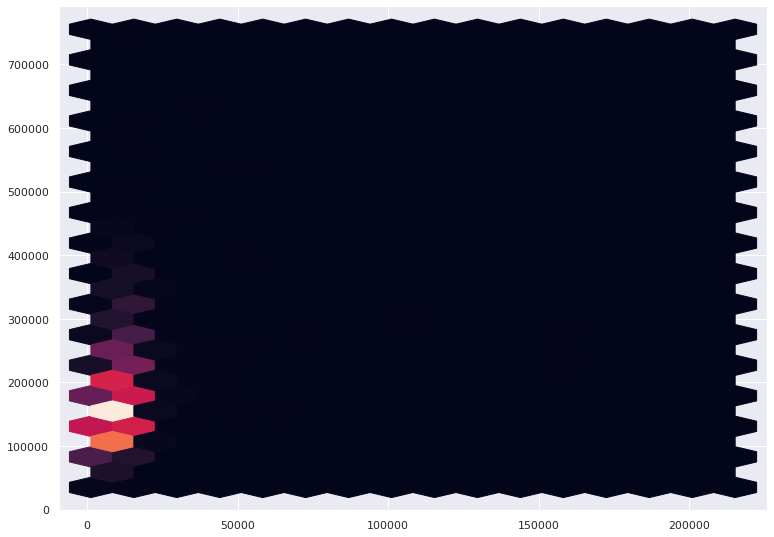

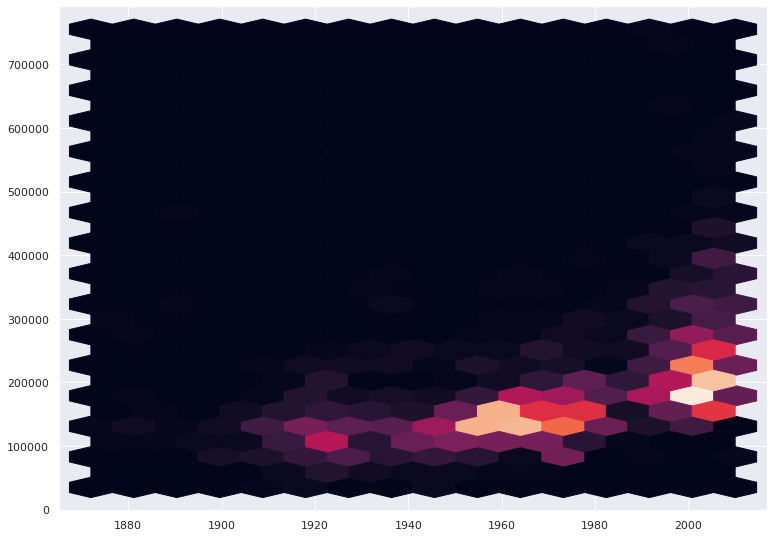

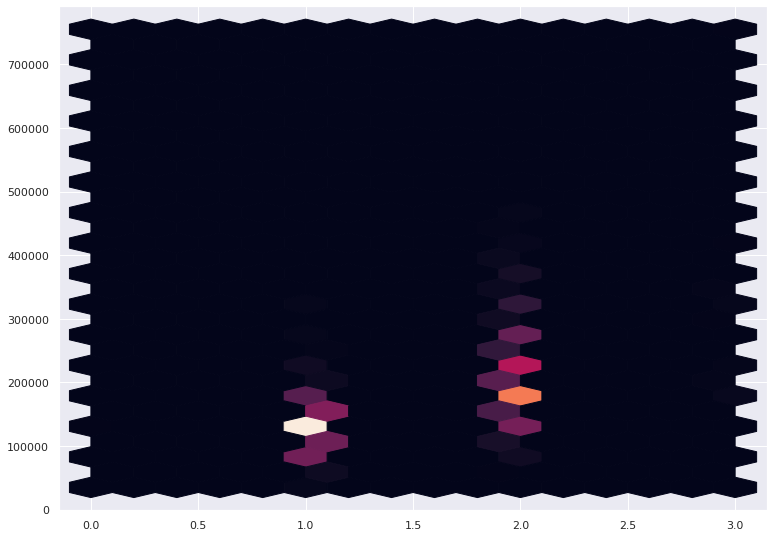

In [322]:
usefule_feat = ['LotArea', 'YearBuilt', 'FullBath']

for f in usefule_feat:
  plt.hexbin(house_df[f], house_df['SalePrice'], gridsize=(15,15) )
  plt.show()
 

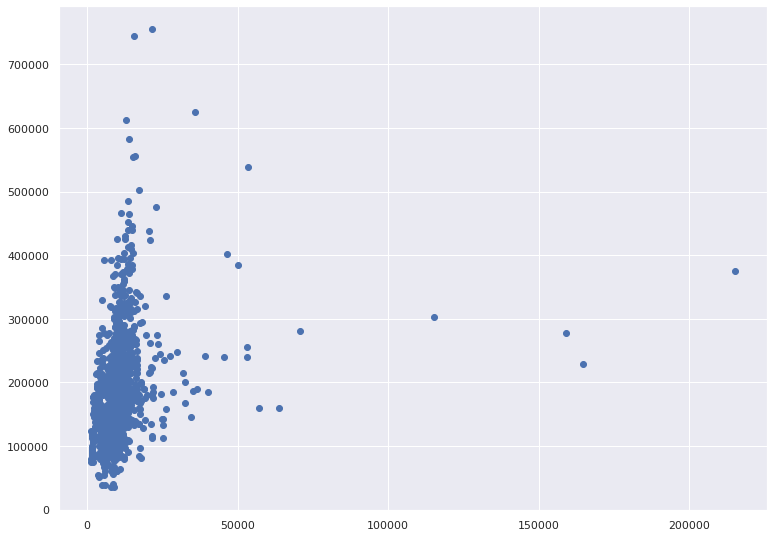

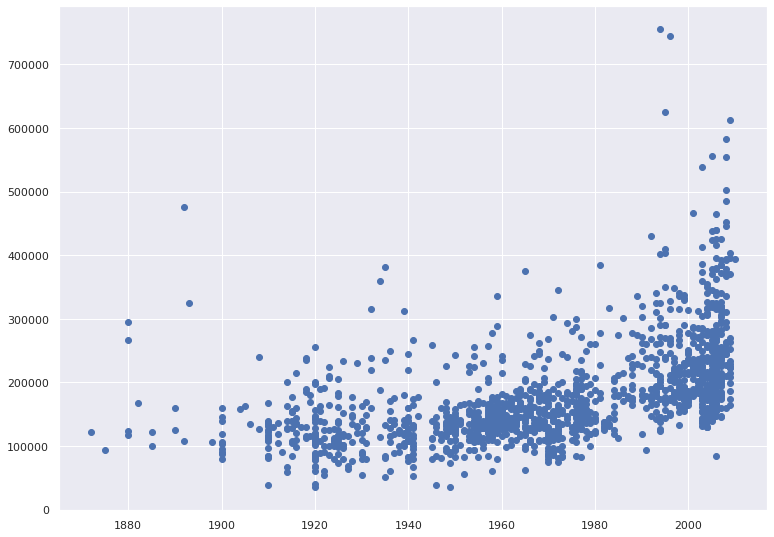

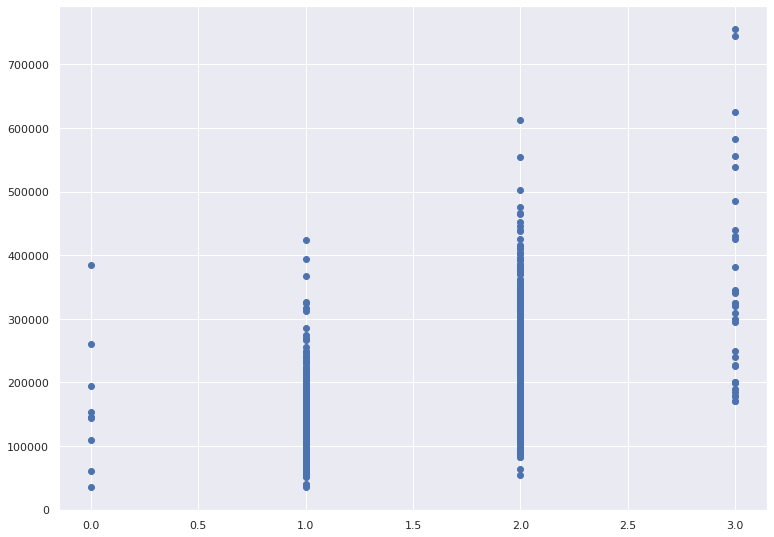

In [323]:
for f in usefule_feat:
  plt.scatter(house_df[f], house_df['SalePrice'] )
  plt.show()
 

We can use regression to fill the missing values. One can train a linear regressor on the data within a column and fill out the missing cells.

Another ways is to delete the associated with the missing value. If the dataset is large enough that would not be a major problem

You can make an educated guess to fill a missing value based on other naswers of the participant


In [324]:
house_df.fillna(house_df.mean(), inplace=True)



In [325]:
cols = list(house_df)

for c in cols:
  if house_df[c].dtype == 'object':    
    dic = {k: v for v, k in enumerate(house_df[c].unique())}
    house_df[c] = house_df[c].replace(dic)

house_df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,0,12,2008,0,0,250000


Yes there is a need to normalize this dataset since the range of the numbers in each distinctive column are drastically different.

In [326]:
numerical_df = house_df.select_dtypes(include=np.number)
normalized_df=(numerical_df-numerical_df.min())/(numerical_df.max()-numerical_df.min())
# normalized_df=(numerical_df-numerical_df.mean())/numerical_df.std()
normalized_df['SalePrice'] = house_df['SalePrice']
normalized_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.235294,0.0,0.150685,0.033420,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.500,0.949275,0.883333,0.0,0.0,0.000000,0.000000,0.00,0.12250,0.000000,0.0,0.0,0.00,0.00,0.00,0.000000,0.125089,0.0,0.0,0.064212,0.140098,0.0,0.00,0.0,0.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.500000,0.0,0.000000,0.000000,0.936364,0.000000,0.50,0.386460,0.0,0.0,0.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,208500
1,0.000685,0.000000,0.0,0.202055,0.038795,0.0,0.000000,0.0,0.0,0.25,0.0,0.041667,0.125,0.0,0.0,0.142857,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.071429,0.066667,0.25,0.00000,0.333333,0.0,0.2,0.00,0.00,0.25,0.166667,0.173281,0.0,0.0,0.121575,0.206547,0.0,0.00,0.0,0.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.0,0.333333,0.000000,0.690909,0.000000,0.50,0.324401,0.0,0.0,0.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,181500
2,0.001371,0.235294,0.0,0.160959,0.046507,0.0,0.333333,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.500,0.934783,0.866667,0.0,0.0,0.000000,0.000000,0.00,0.10125,0.000000,0.0,0.0,0.00,0.00,0.50,0.000000,0.086109,0.0,0.0,0.185788,0.150573,0.0,0.00,0.0,0.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.918182,0.000000,0.50,0.428773,0.0,0.0,0.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,223500
3,0.002056,0.294118,0.0,0.133562,0.038561,0.0,0.333333,0.0,0.0,0.50,0.0,0.083333,0.000,0.0,0.0,0.000000,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.142857,0.133333,0.25,0.00000,0.333333,0.0,0.4,0.25,0.25,0.00,0.166667,0.038271,0.0,0.0,0.231164,0.123732,0.0,0.25,0.0,0.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.416667,0.0,0.333333,0.166667,0.890909,0.333333,0.75,0.452750,0.0,0.0,0.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.2,140000
4,0.002742,0.235294,0.0,0.215753,0.060576,0.0,0.333333,0.0,0.0,0.25,0.0,0.125000,0.000,0.0,0.0,0.000000,0.777778,0.500,0.927536,0.833333,0.0,0.0,0.000000,0.000000,0.00,0.21875,0.000000,0.0,0.0,0.00,0.00,0.75,0.000000,0.116052,0.0,0.0,0.209760,0.187398,0.0,0.00,0.0,0.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.000000,0.583333,0.0,0.333333,0.000000,0.909091,0.000000,0.75,0.589563,0.0,0.0,0.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,250000


There are three ways to handle string/categorical values:

1. hot encoding

2. arbitrary bumbers with categories that have orders

3. use group means for categorical data


No not every categorical data should be treated the same.


we can delete the columns that are extremely correlated with each other since they do not deliver new information. Also, one can delte the columns that have low correlation with the sales price.

In [327]:
X = normalized_df.drop('SalePrice', axis=1)
y = normalized_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Since we have relatively enough data at our disposal, 80/20 is a good percentage for train/test

Yes we have other methods of dividing the data like k-fold in which, we separate the data to k divisions and each time, test our model on one of the folds.

Yes it is imperative to choose the train test split randomely to eliminate all of the possible biases that may occur

In [328]:
reg = LinearRegression().fit(X_train, y_train)
reg_preds = reg.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_preds))
reg_mae = mean_absolute_error(y_test, reg_preds)
print(reg_rmse, reg_mae)


36191.01881119641 22358.49125112695


Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 492 out of 495 | elapsed:   18.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:   18.3s finished


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
0.7137196954361815
{'n_neighbors': 5}


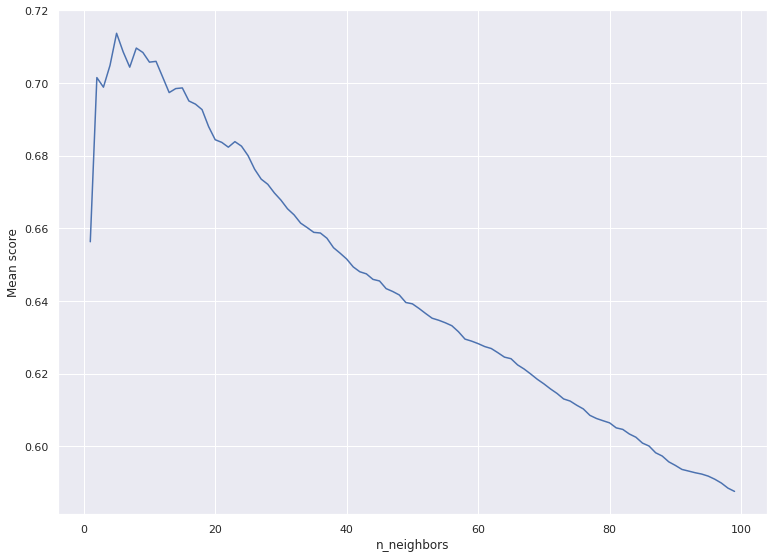

In [329]:
grid_params = {'n_neighbors': np.arange(1, 100, 1)}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv = 5, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

params = [v[1] for x in gs.cv_results_['params'] for v in x.items()]
names = [v[0] for x in gs.cv_results_['params'] for v in x.items()]
scores = [x for x in gs.cv_results_['mean_test_score']]

plt.plot(params, scores)
plt.xlabel(names[0])
plt.ylabel('Mean score')
plt.show()

In [330]:
knn = KNeighborsRegressor(n_neighbors=gs.best_params_[names[0]])
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_preds))
knn_mae = mean_absolute_error(y_test, knn_preds)
print(knn_rmse, knn_mae)

44793.950190266565 27127.010273972603


Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:   10.2s finished


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=23,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.7055285362236381
{'max_depth': 23}


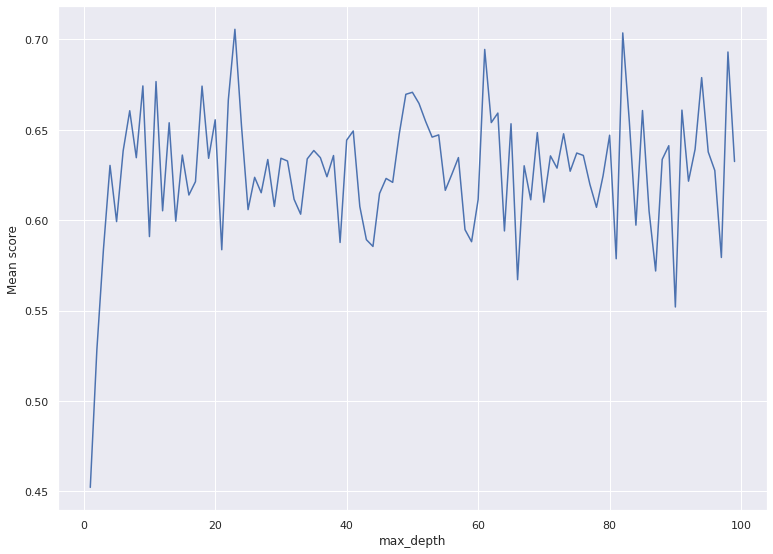

In [331]:
grid_params = {'max_depth':np.arange(1, 100, 1)}


gs = GridSearchCV(DecisionTreeRegressor(), grid_params, verbose = 1, cv = 5, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

params = [v[1] for x in gs.cv_results_['params'] for v in x.items()]
names = [v[0] for x in gs.cv_results_['params'] for v in x.items()]
scores = [x for x in gs.cv_results_['mean_test_score']]

plt.plot(params, scores)
plt.xlabel(names[0])
plt.ylabel('Mean score')
plt.show()


In [332]:
tree = DecisionTreeRegressor(max_depth=gs.best_params_[names[0]])
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))
tree_mae = mean_absolute_error(y_test, tree_preds)
print(tree_rmse, tree_mae)


39214.84753519901 25826.47602739726


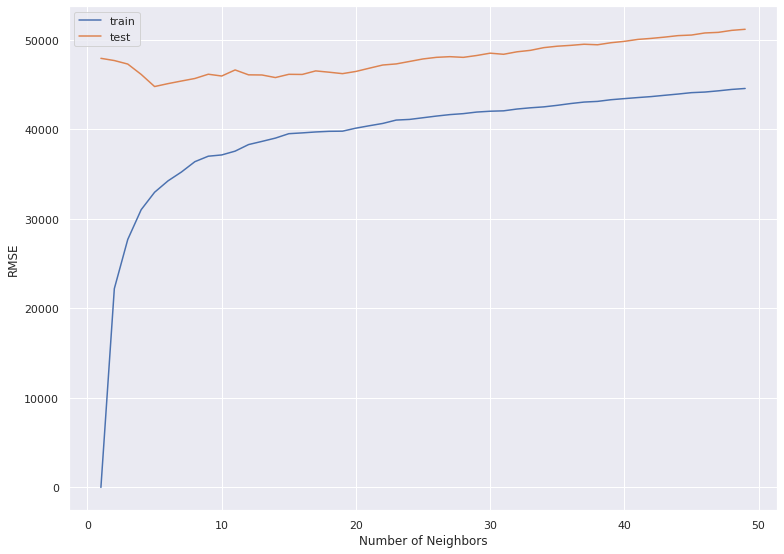

In [333]:
train = []
test = []
params = np.arange(1, 50, 1)
for n in params:
  knn_p = KNeighborsRegressor(n_neighbors=n)
  knn_p.fit(X_train, y_train)
  knn_preds = knn_p.predict(X_test)
  test.append(np.sqrt(mean_squared_error(y_test, knn_preds)))
  
  knn_preds = knn_p.predict(X_train)
  train.append(np.sqrt(mean_squared_error(y_train, knn_preds)))

plt.plot(params, train, label='train')
plt.plot(params, test, label='test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()


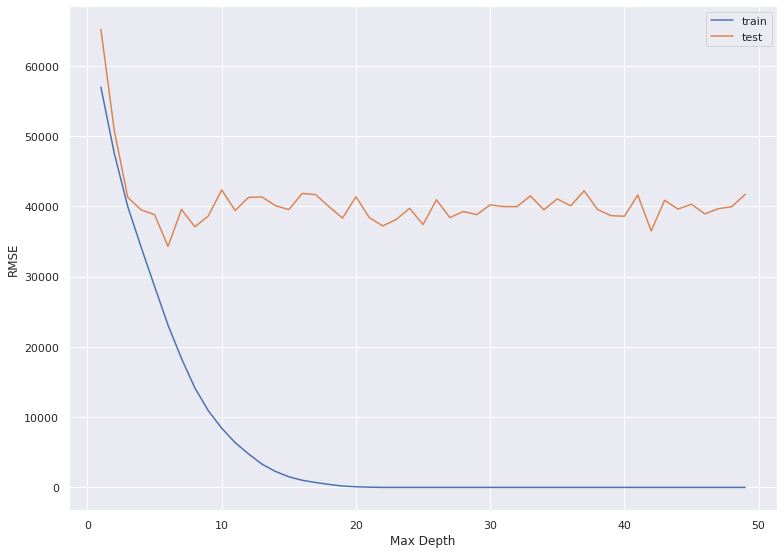

In [334]:
train = []
test = []
params = np.arange(1, 50, 1)
for n in params:
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  tree_preds = tree.predict(X_test)
  test.append(np.sqrt(mean_squared_error(y_test, tree_preds)))
  
  tree_preds = tree.predict(X_train)
  train.append(np.sqrt(mean_squared_error(y_train, tree_preds)))

plt.plot(params, train, label='train')
plt.plot(params, test, label='test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.show()

In KNN we have no overfitting since the gap between the errors remains the same, In Descision Tree method, We can observe that although the test error converges to a constant value, However, the train error converges to 0 which means the model will be overfitted.

In [335]:
grid_params = {'max_depth':np.arange(1, 100, 20), 'n_estimators':np.arange(1, 200, 25)}


gs = GridSearchCV(RandomForestRegressor(), grid_params, verbose = 1, cv = 3, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)



Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=61, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=51, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.8544281912697603
{'max_depth': 61, 'n_estimators': 51}


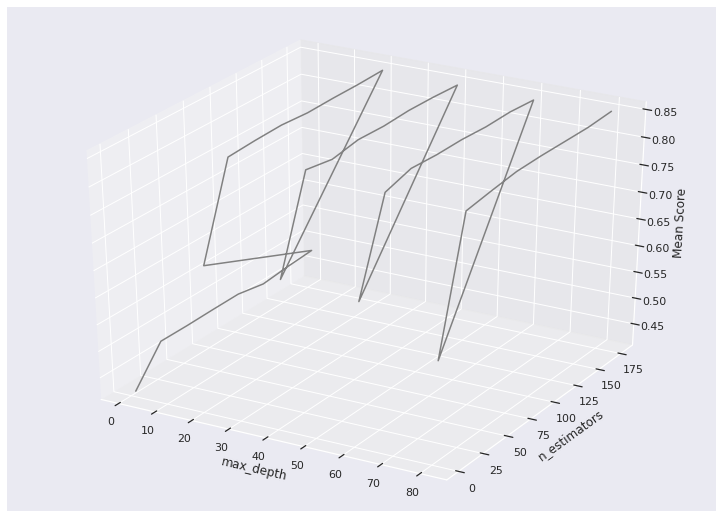

In [336]:


params = [v[1] for x in gs.cv_results_['params'] for v in x.items()]
names = [v[0] for x in gs.cv_results_['params'] for v in x.items()]
scores = np.array([x for x in gs.cv_results_['mean_test_score']])

params1 = np.array([params[x] for x in range(0, len(params), 2)])
params2 = np.array([params[x] for x in range(1, len(params), 2)])


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(params1, params2, scores, 'gray')

ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.set_zlabel('Mean Score');
plt.show()



In [337]:
tree = RandomForestRegressor(max_depth=gs.best_params_['max_depth'], n_estimators=gs.best_params_['n_estimators'])
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))
tree_mae = mean_absolute_error(y_test, tree_preds)
print(tree_rmse, tree_mae)

29269.652039615536 18047.78679828096


In [338]:
er = VotingRegressor([('knn', knn), ('rf', tree), ('lr', reg)])
er.fit(X_train, y_train)

er_preds = er.predict(X_test)
er_rmse = np.sqrt(mean_squared_error(y_test, er_preds))
er_mae = mean_absolute_error(y_test, er_preds)
print(er_rmse, er_mae)

33404.274076780326 19325.008670485266


Voting regressor is better than each individual methods. However, rendom forrest individually, performed better. The reason is the previous methods have some considerable errors therefore they reduce the accuracy of votting regressor.